In [72]:
import pandas as pd
import numpy as np
#sklearn.preprocessing의 scale: 스케일 조정 패키지
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [38]:
#sklearn.ensemble의 RandomForestClassifier:분류랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

In [39]:
ds_ch = pd.read_csv('./Downloads/week4day1/통신고객이탈.csv',encoding='CP949',engine='python')
ds_ch.head()
#타겟이 이산형

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [6]:
#결측치 확인
ds_ch.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [40]:
ds_ch["CHURN"].replace(to_replace = "Active", value=0, inplace=True)
ds_ch["CHURN"].replace(to_replace = "Churned", value=1, inplace=True)

In [41]:
ds_ch_dummy=pd.get_dummies(ds_ch.drop(["CHURN","CUSTOMER_ID"], axis=1))
ds_ch_dummy.head()
#axis=1 -> column이라는 뜻
#단순 식별자 제거

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [73]:
ds_ch_scaled = scale(ds_ch_dummy)
ds_ch_scaled = pd.DataFrame(ds_ch_scaled, columns = ds_ch_dummy.columns)
ds_ch_scaled["CHURN"] = ds_ch["CHURN"]
ds_ch_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None,CHURN
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,0.943527,...,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-1.059853,...,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-1.059853,...,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-1.059853,...,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,0.943527,...,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424,0


In [47]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_ch_scaled.shape[0]) <0.7
ds_ch_train=ds_ch_scaled[msk]
ds_ch_test=ds_ch_scaled[~msk]

ds_ch_train_y=ds_ch_train["CHURN"]
ds_ch_train_x=ds_ch_train.drop("CHURN", axis=1, inplace=False)
ds_ch_test_y=ds_ch_test["CHURN"]
ds_ch_test_x=ds_ch_test.drop("CHURN", axis=1, inplace=False)

print("train data X size : {}".format(ds_ch_train_x.shape))
print("train data Y size : {}".format(ds_ch_train_y.shape))
print("test data X size : {}".format(ds_ch_test_x.shape))
print("test data Y size : {}".format(ds_ch_test_y.shape))

train data X size : (635, 33)
train data Y size : (635,)
test data X size : (295, 33)
test data Y size : (295,)


In [48]:
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(ds_ch_train_x, ds_ch_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(ds_ch_train_x, ds_ch_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(ds_ch_test_x, ds_ch_test_y)))



Accuracy on training set: 0.992
Accuracy on test set: 0.854


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [50]:
ds_ch_train_x_scaled=scale(ds_ch_train_x, axis=0)
ds_ch_test_x_scaled=scale(ds_ch_test_x, axis=0)
pd.DataFrame(ds_ch_train_x_scaled, columns=ds_ch_train_x.columns).head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.061287,-0.066658,0.936779,-0.050954,-0.622843,-0.431938,-0.777862,0.069711,-0.778293,0.958347,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
1,-0.366521,-0.240702,2.073082,0.618542,-0.088273,-0.309382,-0.601091,0.247156,-0.454921,-1.043463,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
2,-0.366521,1.070294,2.357157,0.130457,-0.232062,-0.983441,-1.374462,-0.328554,-0.811538,-1.043463,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
3,1.464884,1.072417,0.084552,0.255718,-0.416436,-0.922163,-0.496134,0.310247,-0.286151,-1.043463,...,2.137797,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
4,-0.137596,-0.139530,0.936779,0.851786,0.053197,-0.248104,0.083895,0.558670,-0.279066,0.958347,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715


In [51]:
rf_scaled=RandomForestClassifier(random_state=1234)
rf_scaled.fit(ds_ch_train_x_scaled, ds_ch_train_y)

print("Accuracy on training set: {:.3f}".format(rf_scaled.score(ds_ch_train_x_scaled, ds_ch_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_scaled.score(ds_ch_test_x_scaled, ds_ch_test_y)))



Accuracy on training set: 0.992
Accuracy on test set: 0.864


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
n_iter_tree=30
train_accuracy=[]
test_accuracy=[]

for n_tree in range(n_iter_tree):
    rf1=RandomForestClassifier(n_estimators=n_tree+1, random_state=1234)
    rf1.fit(ds_ch_train_x_scaled, ds_ch_train_y)
    train_accuracy.append(rf1.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(rf1.score(ds_ch_test_x,ds_ch_test_y))
    
ds_accuracy1=pd.DataFrame()
ds_accuracy1["NumberofTree"]=[n_tree + 1 for n_tree in range(n_iter_tree)]
ds_accuracy1["TrainAccuracy"]=train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy

In [53]:
ds_accuracy1

,NumberofTree,TrainAccuracy,TestAccuracy
0,1,0.935433,0.844068
1,2,0.927559,0.861017
2,3,0.971654,0.861017
3,4,0.955906,0.864407
4,5,0.977953,0.877966
5,6,0.973228,0.867797
6,7,0.987402,0.857627
7,8,0.977953,0.850847
8,9,0.987402,0.854237
9,10,0.988976,0.850847


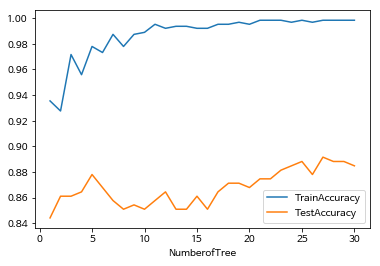

In [54]:
ds_accuracy1.set_index("NumberofTree", inplace=False).plot.line()

In [74]:
train_accuracy=[]
test_accuracy=[]

para_criterion=["gini", "entropy"]
for criterion in para_criterion:
    rf2=RandomForestClassifier(criterion=criterion, random_state=1234)
    rf2.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(rf2.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(rf2.score(ds_ch_test_x,ds_ch_test_y))
    
ds_accuracy2=pd.DataFrame()
ds_accuracy2["Criterion"]=para_criterion
ds_accuracy2["TrainAccuracy"]=train_accuracy
ds_accuracy2["TestAccuracy"]=test_accuracy
ds_accuracy2


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.992126,0.854237
1,entropy,0.995276,0.871186


In [75]:
train_accuracy=[]; test_accuracy=[]
para_max_depth=[i+1 for i in range(10)] * 2
n_iter_depth=10
para_criterion=["gini"]*n_iter_depth+["entropy"]*n_iter_depth
for (criterion,depth) in zip(para_criterion, para_max_depth):
    rf3=RandomForestClassifier(criterion=criterion, max_depth=depth, random_state=1234)
    rf3.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(rf3.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(rf3.score(ds_ch_test_x,ds_ch_test_y))
ds_accuracy3=pd.DataFrame()
ds_accuracy3["Criterion"]=para_criterion
ds_accuracy3["Depth"]=para_max_depth
ds_accuracy3["TrainAccuracy"]=train_accuracy
ds_accuracy3["TestAccuracy"]=test_accuracy

In [57]:
ds_accuracy3

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.807874,0.803390
1,gini,2,0.823622,0.820339
2,gini,3,0.837795,0.823729
3,gini,4,0.866142,0.833898
4,gini,5,0.900787,0.857627
5,gini,6,0.908661,0.850847
6,gini,7,0.924409,0.874576
7,gini,8,0.943307,0.874576
8,gini,9,0.944882,0.867797
9,gini,10,0.946457,0.877966


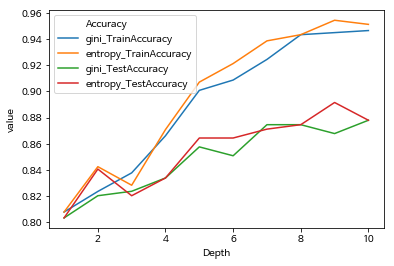

In [58]:
ds_accuracy3_melt=pd.melt(ds_accuracy3,id_vars=["Criterion","Depth"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=ds_accuracy3_melt)

In [76]:
train_accuracy=[]
test_accuracy=[]
n_depth=4
n_iter_min_leaf_size=10
para_criterion=["gini"]*n_iter_min_leaf_size
para_min_leaf_size=[i+1 for i in range(n_iter_min_leaf_size)]

for (criterion,leafsize) in zip(para_criterion, para_min_leaf_size):
    rf4=RandomForestClassifier(criterion=criterion, max_depth=n_depth, min_samples_leaf=leafsize, random_state=1234)
    rf4.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(rf4.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(rf4.score(ds_ch_test_x,ds_ch_test_y))

In [60]:
ds_accuracy4=pd.DataFrame()
ds_accuracy4["Criterion"]=para_criterion
ds_accuracy4["Depth"]=n_depth
ds_accuracy4["MinLeafSize"]=para_min_leaf_size
ds_accuracy4["TrainAccuracy"]=train_accuracy
ds_accuracy4["TestAccuracy"]=test_accuracy
ds_accuracy4

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.866142,0.833898
1,gini,4,2,0.877165,0.837288
2,gini,4,3,0.866142,0.840678
3,gini,4,4,0.861417,0.840678
4,gini,4,5,0.853543,0.833898
5,gini,4,6,0.845669,0.827119
6,gini,4,7,0.850394,0.844068
7,gini,4,8,0.839370,0.837288
8,gini,4,9,0.840945,0.840678
9,gini,4,10,0.839370,0.844068


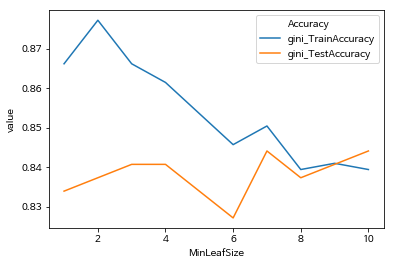

In [61]:
ds_accuracy4_melt=pd.melt(ds_accuracy4,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy4_melt["Accuracy"]=ds_accuracy4_melt["Criterion"]+"_"+ds_accuracy4_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue="Accuracy",data=ds_accuracy4_melt)

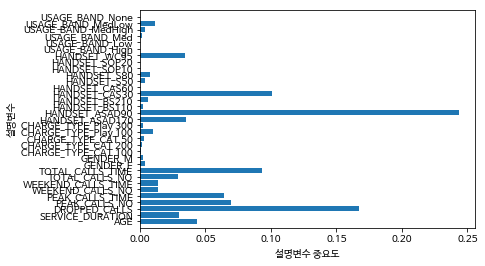

In [62]:
rf_model=RandomForestClassifier(criterion="gini", max_depth=4, min_samples_leaf=10,
                               n_estimators=100, random_state=1234)
rf_model.fit(ds_ch_train_x,ds_ch_train_y)

def plot_feature_importances(model):
    n_features=ds_ch_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_ch_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

plt.figsize=()
plot_feature_importances(rf_model)


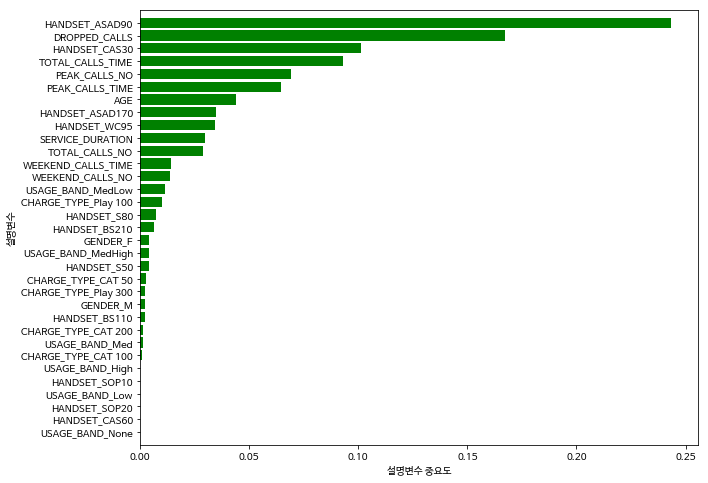

In [63]:
def plot_feature_importances(model):

    cols = ds_ch_train_x.columns

    importances = model.feature_importances_

    indices = np.argsort(model.feature_importances_)

    plt.barh(range(len(indices)), importances[indices], align="center", color='green')

    plt.yticks(range(len(indices)), [cols[i] for i in indices])

    plt.xlabel("설명변수 중요도")

    plt.ylabel('설명변수')

    plt.ylim(-1, len(cols))

 

# 설명 변수 중요도 그래프 함수 실행

plt.figure(figsize=(10,8))

plot_feature_importances(rf_model)

In [77]:
ds_feature_importance=pd.DataFrame()
ds_feature_importance["feature"]=ds_ch_train_x.columns
ds_feature_importance["importance"]=rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending=False)

,feature,importance
17,HANDSET_ASAD90,0.243476
2,DROPPED_CALLS,0.167410
20,HANDSET_CAS30,0.101191
8,TOTAL_CALLS_TIME,0.093166
3,PEAK_CALLS_NO,0.069296
4,PEAK_CALLS_TIME,0.064396
0,AGE,0.043922
16,HANDSET_ASAD170,0.035031
26,HANDSET_WC95,0.034354
1,SERVICE_DURATION,0.029880
